In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('housing.csv')

In [3]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


<AxesSubplot:xlabel='median_house_value', ylabel='Count'>

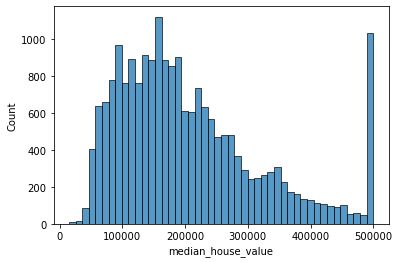

In [5]:
sns.histplot(df.median_house_value)

In [8]:
df = df.drop(['ocean_proximity'], axis=1)

In [9]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0


In [10]:
df.isnull().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
dtype: int64

In [11]:
df.population.median()

1166.0

In [12]:
# split the dataset
n = len(df)
n_val = int(n * 0.2)

n_test = int(n * 0.2)

n_train = n - n_val - n_test # get remainder because getting 60% with rounding is not accurate

n_val, n_test, n_train

(4128, 4128, 12384)

In [13]:
n_val + n_test + n_train == n

True

In [14]:
# shuffle records

idx = np.arange(n)  #  assign var to array of rows (indices)
np.random.seed(42)  #  make the shuffle reproducible
np.random.shuffle(idx) # shuffle the rows


array([20046,  3024, 15663, ...,  5390,   860, 15795])

In [16]:
len(idx)

20640

In [17]:
# split the data
df_train = df.iloc[idx[:n_train]] 
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]

In [18]:
n_val, n_test, n_train

(4128, 4128, 12384)

In [19]:
# apply logarithmic function and get target variables (y)
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)


In [20]:
y_train

array([10.77270764, 10.7320612 , 13.12236738, ..., 11.89683321,
       11.93032573, 12.9487264 ])

In [21]:
# remove the target var from the sets so we don't accidentally use it to train the model
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [46]:
# code from the lessons
X = [
    [148, 24, 1385],
    [132, 25, 2031],
    [453, 11, 86],
    [158, 24, 185],
    [172, 25, 201],
    [413, 11, 86],
    [38,  54, 185],
    [142, 25, 431],
    [453, 31, 86],
]

X = np.array(X)
X

array([[ 148,   24, 1385],
       [ 132,   25, 2031],
       [ 453,   11,   86],
       [ 158,   24,  185],
       [ 172,   25,  201],
       [ 413,   11,   86],
       [  38,   54,  185],
       [ 142,   25,  431],
       [ 453,   31,   86]])

In [48]:
# code from the lessons
y = [10000, 20000, 15000, 20050, 10000, 20000, 15000, 25000, 12000]

In [49]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [50]:
train_linear_regression(X, y)

(25844.754055766913, array([ -16.08906468, -199.47254894,   -1.22802883]))

In [74]:
# first model with zeros replacing missing values
X_train = df_train.fillna(0).values
w0, w = train_linear_regression(X_train, y_train)
y_pred = w0 + X_train.dot(w)

In [75]:
y_pred

array([11.28055213, 11.90427911, 12.46507934, ..., 11.53259294,
       11.92377088, 12.54517195])

In [53]:
w0, w

(-11.686975241845731,
 array([-2.76255120e-01, -2.82087184e-01,  2.91329621e-03, -8.64531514e-06,
         1.50811922e-04, -2.08205659e-04,  5.69546573e-04,  1.71308139e-01]))

<AxesSubplot:ylabel='Count'>

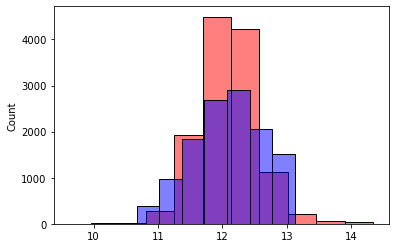

In [89]:
sns.histplot(y_pred, color='red', alpha=0.5, bins=10)
sns.histplot(y_train, color='blue', alpha=0.5, bins=10)

In [80]:
# second model with the mean replacing missing values
mean_value = df.total_bedrooms.mean()
X_train_with_mean = df_train.fillna(mean_value).values
w0_mean, w_mean = train_linear_regression(X_train_with_mean, y_train)
y_pred_mean = w0_mean + X_train_with_mean.dot(w_mean)

<AxesSubplot:ylabel='Count'>

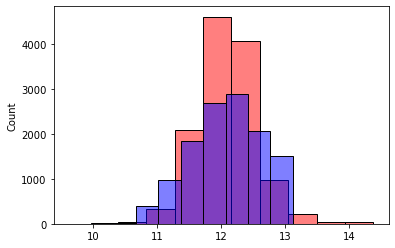

In [88]:
sns.histplot(y_pred_mean, color='red', alpha=0.5, bins=10)
sns.histplot(y_train, color='blue', alpha=0.5, bins=10)

In [83]:
# third model with the median replacing missing values
median_value = df.total_bedrooms.median()
X_train_with_med = df_train.fillna(median_value).values
w0_med, w_med = train_linear_regression(X_train_with_med, y_train)
y_pred_med = w0 + X_train_with_med.dot(w)

<AxesSubplot:ylabel='Count'>

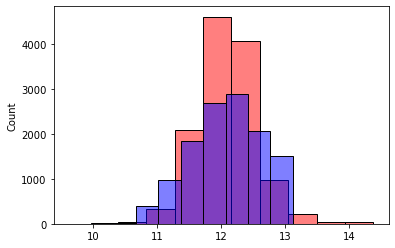

In [90]:
sns.histplot(y_pred_med, color='red', alpha=0.5, bins=10)
sns.histplot(y_train, color='blue', alpha=0.5, bins=10)

In [68]:
def rmse(y, y_pred): 
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [92]:
# first model rmse
rmse(y_train, y_pred)

0.3413135910156676

In [93]:
#second model rmse
rmse(y_train, y_pred_mean)

0.34104146565797155

In [94]:
# third model rmse
rmse(y_train, y_pred_med)

0.3410603298492329

In [95]:
def prepare_X(df, fill_var):
    df_num = df.fillna(fill_var)
    X = df_num.values
    return X

In [99]:
# first model (0)
X_train = prepare_X(df_train, 0)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val, 0)
y_pred = w0 + X_val.dot(w)
round(rmse(y_val, y_pred), 2)


0.33

In [100]:
median_value

435.0

In [101]:
mean_value

537.8705525375618

In [104]:
# second model (mean)
X_train = prepare_X(df_train, mean_value)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val, mean_value)
y_pred = w0 + X_val.dot(w)
round(rmse(y_val, y_pred), 2)

0.33

In [105]:
# third model (median)
X_train = prepare_X(df_train, median_value)
w0, w = train_linear_regression(X_train, y_train)

X_val = prepare_X(df_val, median_value)
y_pred = w0 + X_val.dot(w)
round(rmse(y_val, y_pred), 2)

0.33

In [111]:
r_list = [0, 0.000001, 0.0001, 0.001, 0.01, 0.1, 1, 5, 10]

In [110]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [122]:
for item in r_list:
    X_train = prepare_X(df_train, 0)
    w0, w = train_linear_regression_reg(X_train, y_train, r=item)

    X_val = prepare_X(df_val, 0)
    y_pred = w0 + X_val.dot(w)
    score = rmse(y_val, y_pred)
    
    print(item, w0, score, 2)
    

0 -11.686975241845731 0.32953303652362076 2
1e-06 -11.686959175769395 0.32953303616486074 2
0.0001 -11.685368865268687 0.32953300097054417 2
0.001 -11.670931318003749 0.3295327038670748 2
0.01 -11.528493585785434 0.32953193659957364 2
0.1 -10.274500282293513 0.32969472053955373 2
1 -4.920480897721669 0.33378872200087284 2
5 -1.4820957456463928 0.3392485345504681 2
10 -0.7899311832071997 0.3406063807809048 2


In [115]:
r = 0.01

In [126]:
X_train = prepare_X(df_train, 0)
w0, w = train_linear_regression_reg(X_train, y_train, r=r)

X_val = prepare_X(df_val, 0)
y_pred = w0 + X_val.dot(w)
score = rmse(y_val, y_pred)
score

0.32953193659957364

In [128]:
# use different seed values

def train_linear_regression_new_seed(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]


score_list = []

for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    np.random.seed(seed)  #  make the shuffle reproducible
    np.random.shuffle(idx) # shuffle the rows
    # split the data
    df_train = df.iloc[idx[:n_train]] 
    df_val = df.iloc[idx[n_train:n_train + n_val]]
    df_test = df.iloc[idx[n_train + n_val:]]
    # apply logarithmic function and get target variables (y)
    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)
    # remove the target var from the sets so we don't accidentally use it to train the model
    del df_train['median_house_value']
    del df_val['median_house_value']
    del df_test['median_house_value']
    X_train = prepare_X(df_train, 0)
    w0, w = train_linear_regression_new_seed(X_train, y_train)

    X_val = prepare_X(df_val, 0)
    y_pred = w0 + X_val.dot(w)
    print(rmse(y_val, y_pred))
    score_list.append(rmse(y_val, y_pred))

0.3356488966185664
0.33938901103694147
0.3422619211156627
0.34414004687733546
0.3409237458478422
0.3352757710949055
0.34214414642061314
0.3394619924652766
0.34505590289379606
0.34599726861341285


In [131]:
score_array = np.array(score_list)

In [134]:
round(np.std(score_array), 3)

0.003

In [137]:
# use seed 9
np.random.seed(9)  #  make the shuffle reproducible
np.random.shuffle(idx) # shuffle the rows
# split the data
df_train = df.iloc[idx[:n_train]] 
df_val = df.iloc[idx[n_train:n_train + n_val]]
df_test = df.iloc[idx[n_train + n_val:]]
# apply logarithmic function and get target variables (y)
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)
# remove the target var from the sets so we don't accidentally use it to train the model
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

# combine datasets

df_full_train = pd.concat([df_train, df_val])

X_full_train = prepare_X(df_full_train, 0)
y_full_train = np.concatenate([y_train, y_val])

w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

X_test = prepare_X(df_test, 0)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score


0.3391907718570384